In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
df_o = pd.read_excel('./online_retail_data.xlsx')
df_o.shape

(541909, 8)

In [3]:
df = df_o.copy(deep=True)

In [4]:
df.head().T

,0,1,2,3,4
InvoiceNo,536365,536365,536365,536365,536365
StockCode,85123A,71053,84406B,84029G,84029E
Description,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.
Quantity,6,6,8,6,6
InvoiceDate,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00
UnitPrice,2.55,3.39,2.75,3.39,3.39
CustomerID,17850,17850,17850,17850,17850
Country,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom


In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
len(df['StockCode'].value_counts())

4070

In [9]:
df['StockCode'].value_counts()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
84879     1502
22720     1477
22197     1476
21212     1385
20727     1350
22383     1348
22457     1280
23203     1267
POST      1256
22386     1251
22469     1239
22960     1229
21931     1214
22086     1210
22411     1202
20728     1197
22382     1192
22961     1182
22666     1180
23298     1179
22699     1138
22384     1137
23209     1135
82482     1129
22993     1111
          ... 
90046        1
90048        1
90068        1
22016        1
21858        1
20896        1
21337        1
20950        1
20957        1
84031b       1
21134        1
21268        1
21274        1
21282        1
21283        1
21310        1
21330        1
21431        1
21854        1
21432        1
21474        1
21511        1
21589        1
21610        1
21653        1
21765        1
21805        1
84967A       1
21825        1
84797B       1
Name: StockCode, Length: 4070, dtype: int64

In [10]:
df_temp = df.groupby(['InvoiceNo', 'StockCode'])
df_temp.first()

Description  Quantity  \
InvoiceNo StockCode                                                  
536365    21730        GLASS STAR FROSTED T-LIGHT HOLDER         6   
          22752             SET 7 BABUSHKA NESTING BOXES         2   
          71053                      WHITE METAL LANTERN         6   
          84029E          RED WOOLLY HOTTIE WHITE HEART.         6   
          84029G     KNITTED UNION FLAG HOT WATER BOTTLE         6   
          84406B          CREAM CUPID HEARTS COAT HANGER         8   
          85123A      WHITE HANGING HEART T-LIGHT HOLDER         6   
536366    22632                HAND WARMER RED POLKA DOT         6   
          22633                   HAND WARMER UNION JACK         6   
536367    21754                 HOME BUILDING BLOCK WORD         3   
          21755                 LOVE BUILDING BLOCK WORD         3   
          21777              RECIPE BOX WITH METAL HEART         4   
          22310                  IVORY KNITTED MUG COSY          6   
          22622           BOX OF VINTAGE ALPHABET BLOCKS         2   
          22623            BOX OF VINTAGE JIGSAW BLOCKS          3   
          22745               POPPY'S PLAYHOUSE BEDROOM          6   
          22748                POPPY'S PLAYHOUSE KITCHEN         6   
          22749        FELTCRAFT PRINCESS CHARLOTTE DOLL         8   
          48187                      DOORMAT NEW ENGLAND         4   
          84879            ASSORTED COLOUR BIRD ORNAMENT        32   
          84969       BOX OF 6 ASSORTED COLOUR TEASPOONS         6   
536368    22912           YELLOW COAT RACK PARIS FASHION         3   
          22913              RED COAT RACK PARIS FASHION         3   
          22914             BLUE COAT RACK PARIS FASHION         3   
          22960                 JAM MAKING SET WITH JARS         6   
536369    21756                 BATH BUILDING BLOCK WORD         3   
536370    10002              INFLATABLE POLITICAL GLOBE         48   
          21035          SET/2 RED RETROSPOT TEA TOWELS         18   
          21724          PANDA AND BUNNIES STICKER SHEET        12   
          21731            RED TOADSTOOL LED NIGHT LIGHT        24   
...                                                  ...       ...   
C581409   82484        WOOD BLACK BOARD ANT WHITE FINISH        -1   
          84946             ANTIQUE SILVER T-LIGHT GLASS        -1   
          85127       SMALL SQUARE CUT GLASS CANDLESTICK        -5   
          85199L     LARGE HANGING IVORY & RED WOOD BIRD        -1   
C581460   22107                       PIZZA PLATE IN BOX        -1   
          22197                           POPCORN HOLDER        -5   
C581462   16219             HOUSE SHAPE PENCIL SHARPENER       -48   
          21642                ASSORTED TUTTI FRUTTI PEN       -72   
C581463   85048      15CM CHRISTMAS GLASS BALL 20 LIGHTS        -2   
C581464   23458                 DOLLY CABINET 3 DRAWERS         -1   
          71477       COLOURED GLASS STAR T-LIGHT HOLDER        -6   
C581465   20914      SET/5 RED RETROSPOT LID GLASS BOWLS        -3   
          21876                            POTTERING MUG        -4   
          22171         3 HOOK PHOTO SHELF ANTIQUE WHITE        -1   
          23660                       HENRIETTA HEN MUG         -2   
C581466   21216         SET 3 RETROSPOT TEA,COFFEE,SUGAR        -1   
          21232           STRAWBERRY CERAMIC TRINKET POT        -1   
          21535             RED RETROSPOT SMALL MILK JUG        -2   
          22720        SET OF 3 CAKE TINS PANTRY DESIGN         -2   
          22838            3 TIER CAKE TIN RED AND CREAM        -1   
C581468   21314            SMALL GLASS HEART TRINKET POT       -10   
          22098                BOUDOIR SQUARE TISSUE BOX       -12   
C581470   23084                       RABBIT NIGHT LIGHT        -4   
C581484   23843              PAPER CRAFT , LITTLE BIRDIE    -80995   
C581490   22178          VICTORIAN GLASS HANGING T-LIGH

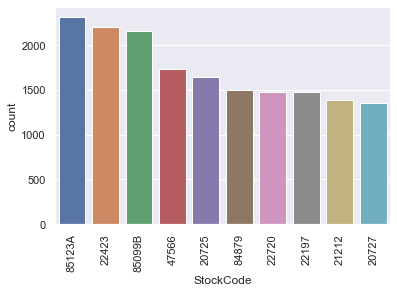

In [11]:
sns.countplot(x = df['StockCode'], data = df, order = df['StockCode'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

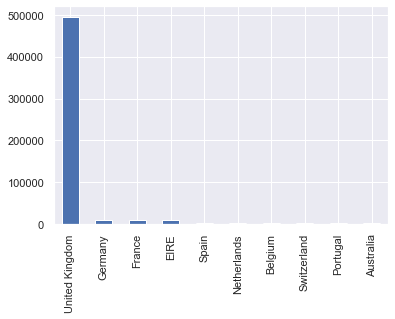

In [12]:
df.Country.value_counts()[:10].plot(kind='bar')

In [13]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [14]:
df['Hour'] = df['InvoiceDate'].apply(lambda time: time.hour)
df['Month'] = df['InvoiceDate'].apply(lambda time: time.month)
df['Day of Week'] = df['InvoiceDate'].apply(lambda time: time.dayofweek)
df['Year'] = df['InvoiceDate'].apply(lambda time: time.year)
df['Date'] = df['InvoiceDate'].apply(lambda time: time.day)

dmap = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
df['Day of Week'] = df['Day of Week'].map(dmap)


df["Day/Night"] = df["InvoiceDate"].apply(lambda x : "Night" if int(x.strftime("%H")) > 18 else "Day")

In [15]:
df.head().T

,0,1,2,3,4
InvoiceNo,536365,536365,536365,536365,536365
StockCode,85123A,71053,84406B,84029G,84029E
Description,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.
Quantity,6,6,8,6,6
InvoiceDate,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00
UnitPrice,2.55,3.39,2.75,3.39,3.39
CustomerID,17850,17850,17850,17850,17850
Country,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom
Hour,8,8,8,8,8
Month,12,12,12,12,12


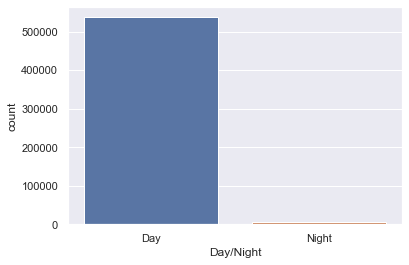

In [18]:
sns.countplot(x='Day/Night',data=df)

Text(0.5, 1.0, 'People goes for shopping on each days of the week')

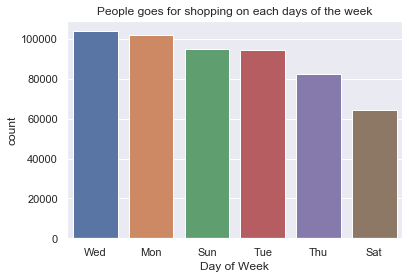

In [24]:
sns.countplot(x = 'Day of Week', data = df, order = df['Day of Week'].value_counts().index)
plt.title("People goes for shopping on each days of the week")

Text(0.5, 1.0, 'People goes for shopping during each Month ')

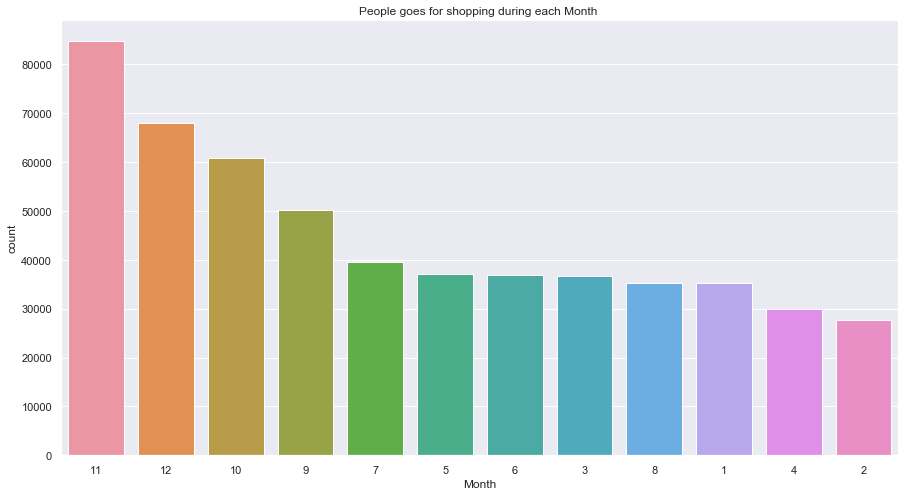

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(x='Month', data=df, order = df['Month'].value_counts().index)
plt.title("People goes for shopping during each Month ")

Text(0.5, 1.0, 'Shopping trends on yearly basis')

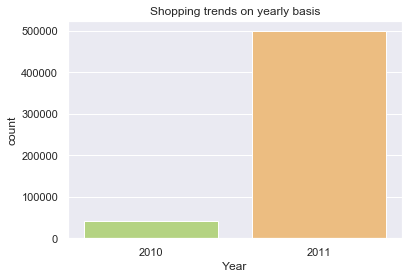

In [27]:
sns.countplot(x= "Year", data= df, palette='RdYlGn_r')
plt.title("Shopping trends on yearly basis")

`NOTE`: This yearly trend doesn't makes any sense due to lack of data for year 2010